In [1]:
import tensorflow as tf
%load_ext autoreload
%autoreload
from Scripts import get_data
from Scripts import NeuralNetwork
from Scripts import plot
from Scripts import metrics
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
%reload_ext autoreload

In [25]:
X_train, y_train, _, _, X_test, y_test = get_data.load_dataset(flatten=True)

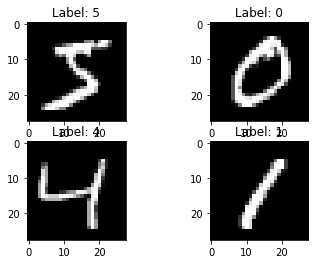

In [26]:
%matplotlib inline
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

In [27]:
X_train.shape

(50000, 784)

In [29]:
X_test.shape

(10000, 784)

In [30]:
ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))

OneHotEncoder()

In [31]:
y_train_ohe = ohe.transform(y_train.reshape(-1, 1)).toarray()

In [32]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1)).toarray()

Epoch 9
Train accuracy: 0.863225
Val accuracy: 0.849


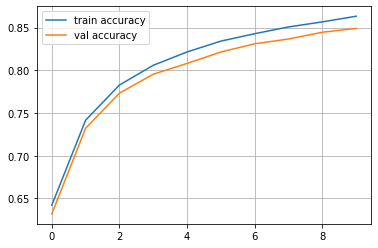

0.849


In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
epochs = 10
batch_size = 500
eta = 0.001
lmbd = 0.001
n_hidden_neurons = 50
val_res = []


for train_index, test_index in kf.split(X_train):
    X_train_, X_val_ = X_train[train_index], X_train[test_index]
    y_train_, y_val_ = y_train_ohe[train_index], y_train_ohe[test_index]

    dnn = NeuralNetwork.NN_clf(X_train_, y_train_,eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                        n_hidden_neurons=n_hidden_neurons, n_categories=y_train_ohe.shape[1])
    dnn.train(X_val_, y_val_,ohe.transform)
    val_predict = dnn.predict(X_val_)
    print(metrics.compute_accuracy(y_val_.argmax(axis=1).reshape(y_val_.argmax(axis=1).shape[0],1),val_predict.reshape(val_predict.shape[0],1)))
    val_res.append(metrics.compute_accuracy(y_val_.argmax(axis=1).reshape(y_val_.argmax(axis=1).shape[0],1),val_predict.reshape(val_predict.shape[0],1)))

In [36]:
val_res = np.asarray(val_res)

In [42]:
val_res.std()

0.0027251421981246975

In [43]:
np.median(val_res)

0.8515

In [44]:
test_predict = dnn.predict(X_test)

In [45]:
print(metrics.compute_accuracy(y_test.reshape(y_test.shape[0],1),test_predict.reshape(test_predict.shape[0],1)))

0.8665


In [48]:
y_pred_ohe = ohe.transform(test_predict.reshape(-1, 1)).toarray()

In [49]:
conf_matrix = plot.compute_modified_confusion_matrix_nonorm(y_test_ohe, y_pred_ohe)

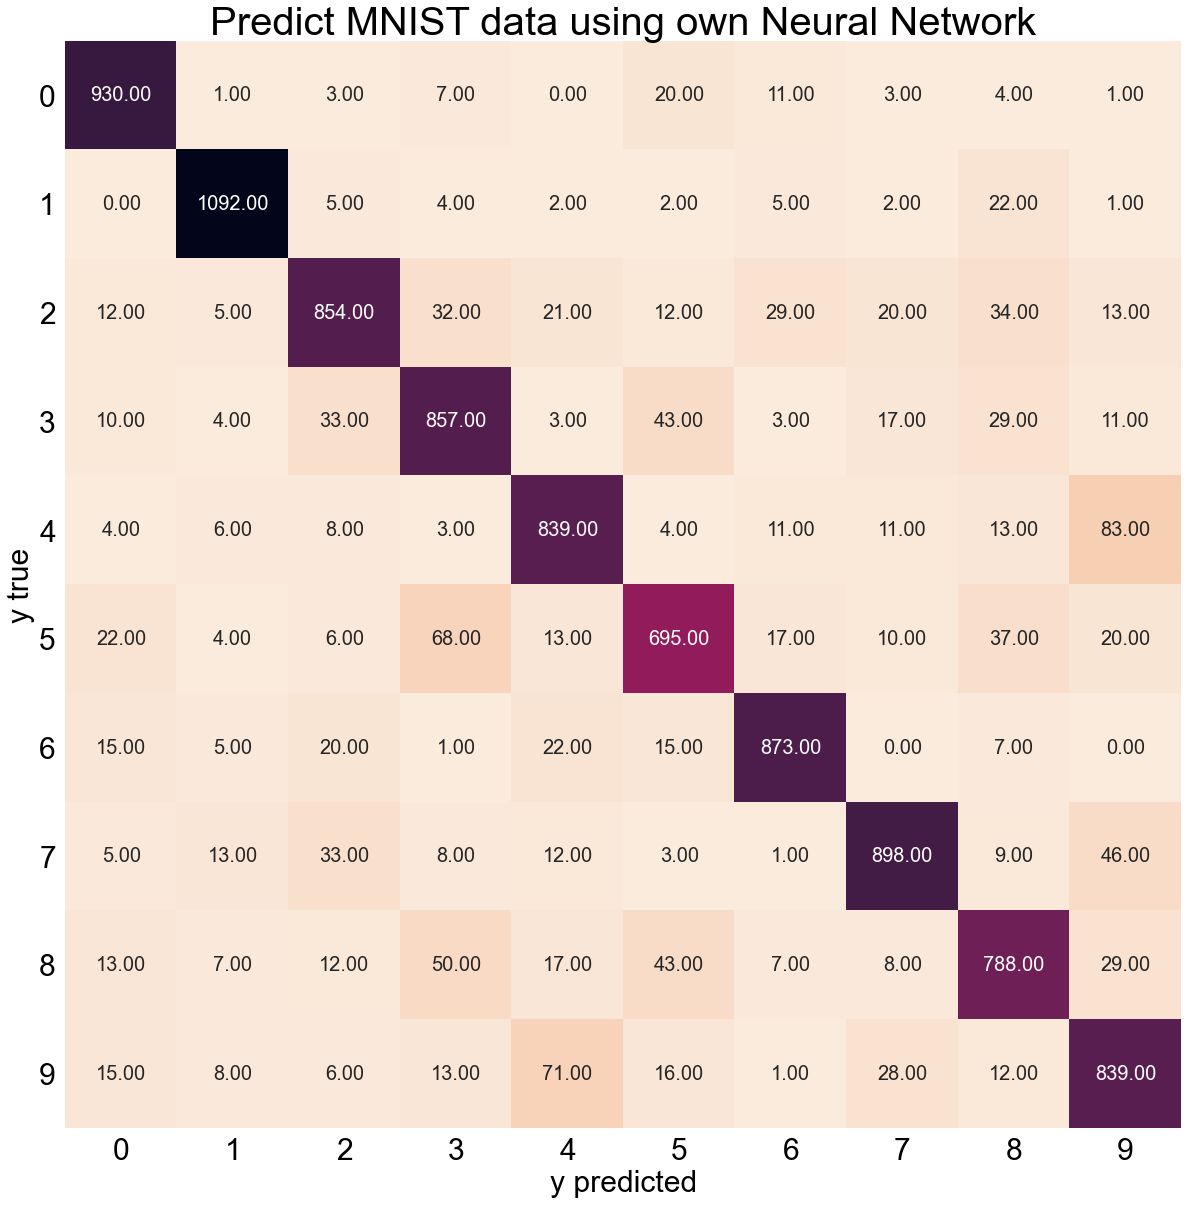

In [50]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using own Neural Network", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
plt.savefig("Results/MNIST_confMatrix_ownNN.png",dpi=100)
plt.show()